##  Big Data Mart Sale Problem

## Description

###  Import Required Liberary

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [132]:
import pandas as pd
df= pd.read_csv("Big Mart Train.csv ")

In [133]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [134]:
df.shape

(8523, 12)

####  853 rows and 12 coluns inside the table including target columns

### Null Values

In [135]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

####  We can see that their is two columns who have null values (item_weight,outlet_size)

In [136]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [137]:

df["Item_Weight"]=df["Item_Weight"].fillna(np.mean(df["Item_Weight"])) 

####  Convert the Item_Weight column's null value from mean of that column because its continuous type of data

In [138]:

df["Outlet_Size"].replace(np.NaN,df["Outlet_Size"].mode()[0],inplace=True)

#### Convert the Outlet_size column's null values from the mode because the colum's data type is categorical in nature

In [139]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

####  Now we see that thier is no null value in any of the column

In [140]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Text(0.5, 1.0, 'Null values')

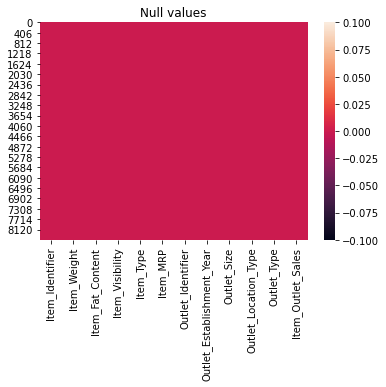

In [141]:
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null values")

####  We can see in above heat map their is no null value

### Making Data Frame for the Nominal Type of Data

In [142]:
df_visualization_nominal=df[["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size",
                            "Outlet_Location_Type","Outlet_Type"]].copy()

In [143]:
df_visualization_nominal.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

###  Visulaization of Data

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


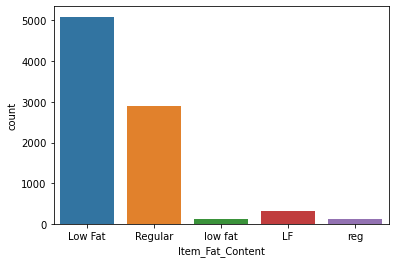

In [144]:
import seaborn as sns
ax=sns.countplot(x="Item_Fat_Content",data=df_visualization_nominal)
print(df_visualization_nominal["Item_Fat_Content"].value_counts())

####  We can see their is 4 variable in (item_fat_content) column in which Low Fat column have largest count value

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


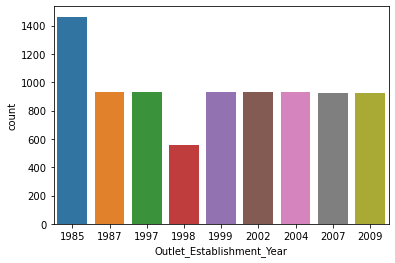

In [145]:
ax=sns.countplot(x="Outlet_Establishment_Year",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Establishment_Year"].value_counts())

####  In above graph we can see that we have 9 varibale in which (1985) was top most oulet_eastblishment_Year

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


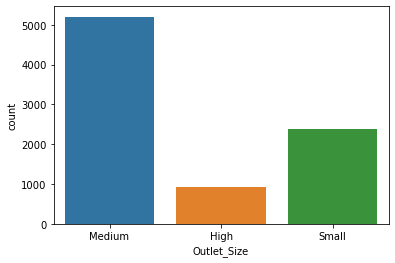

In [146]:
ax=sns.countplot(x="Outlet_Size",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Size"].value_counts())

#### We can see we have three variable(Medium,high,Small) in which Medium  type outlet_size is highly eastiblished in passing year

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


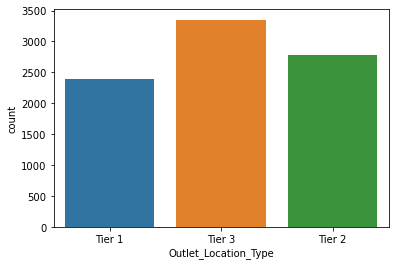

In [147]:
ax=sns.countplot(x="Outlet_Location_Type",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Location_Type"].value_counts())

#### Tier 3 count is very high compare to other two variable

###  Making Data Frame of the Ordinal Data

In [148]:
df_visualization_ordinal=df[["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]].copy()

In [149]:
df_visualization_ordinal.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

Text(0.5, 1.0, 'Item_Weight Vs Sales')

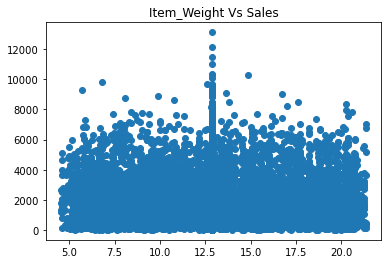

In [150]:
plt.scatter(x=df["Item_Weight"],y=df["Item_Outlet_Sales"])
plt.title("Item_Weight Vs Sales")

###  Checking the Continuous value of the float type column

In [151]:
df_visualization_continuous=df[["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]].copy()

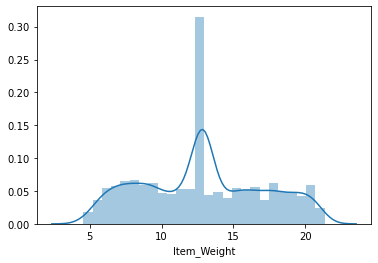

In [152]:
import seaborn as sns
sns.distplot(df_visualization_continuous["Item_Weight"],kde=True)

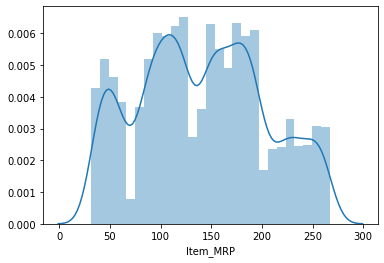

In [153]:
sns.distplot(df_visualization_continuous["Item_MRP"],kde=True)

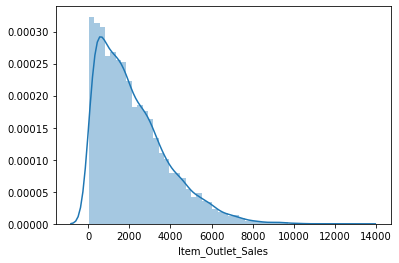

In [154]:
sns.distplot(df_visualization_continuous["Item_Outlet_Sales"],kde=True)

### Encoding of Data Frame

In [155]:
from sklearn.preprocessing import OrdinalEncoder
ec=OrdinalEncoder()

In [156]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=ec.fit_transform(df[i].values.reshape(-1,1))

In [157]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


###  Describe the Dataset

In [158]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


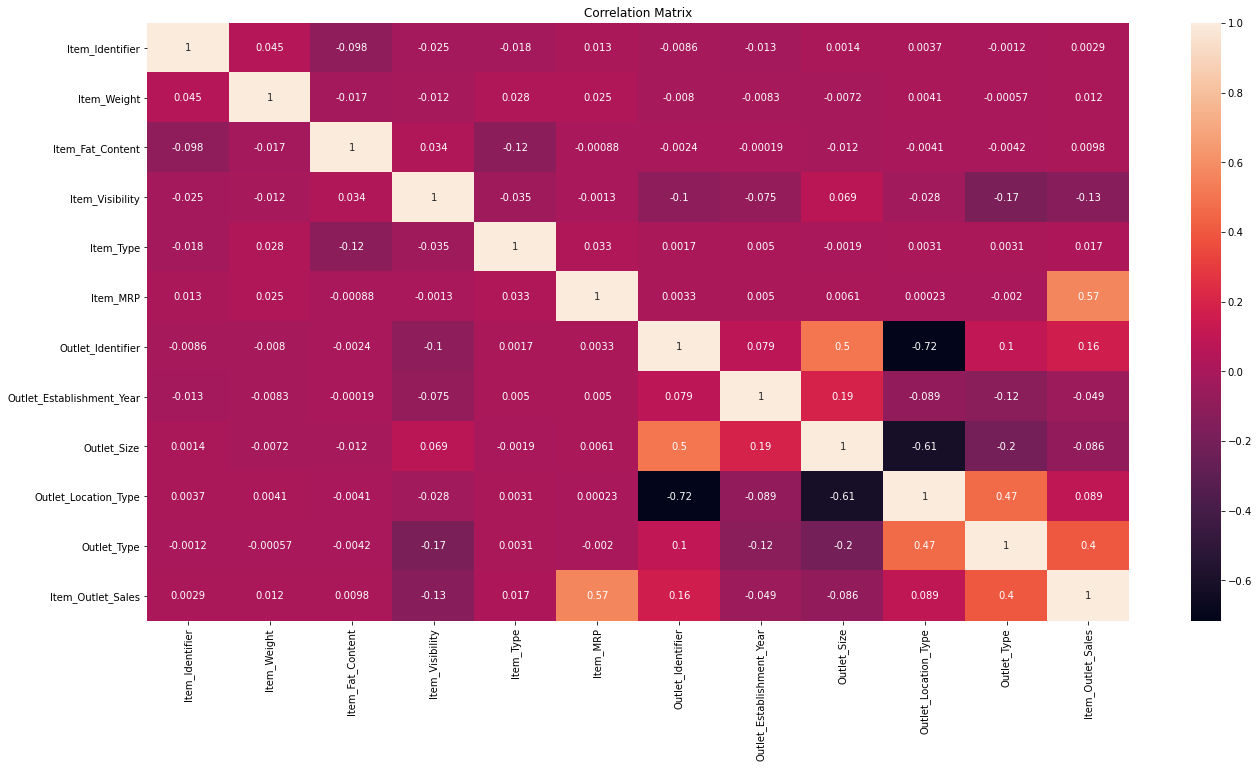

In [159]:
corr_mat=df.corr()
plt.figure(figsize=[22,11])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()


In [160]:
corr_matrix=df.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Type                    0.017048
Item_Weight                  0.011550
Item_Fat_Content             0.009800
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.086182
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 1.0, 'Correlation')

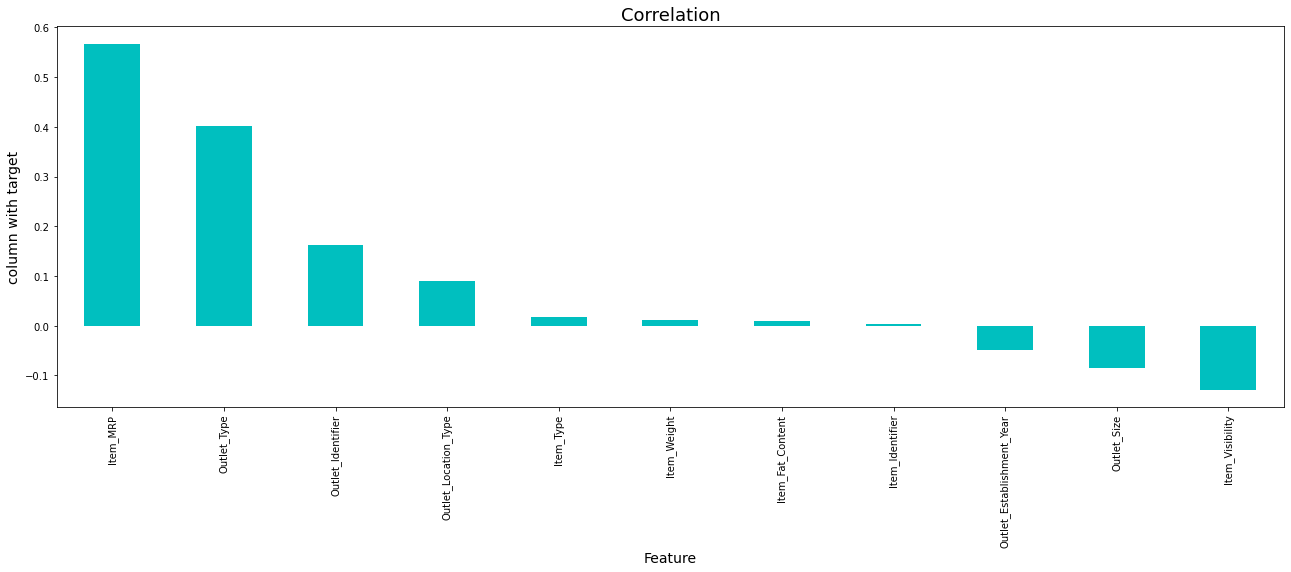

In [161]:
plt.figure(figsize=(22,7))
df.corr()["Item_Outlet_Sales"].sort_values(ascending=False).drop(["Item_Outlet_Sales"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("column with target",fontsize=14)
plt.title("Correlation",fontsize=18)

In [162]:
df.skew()


Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

#### Keeping the +/- 0.5 Range for skewness,Here the column which does not lie within the columns


### Treating of skewness

In [163]:
x=df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"]].copy()

In [164]:
df_skewed_columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,1999
1,5.920,0.019278,48.2692,2009
2,17.500,0.016760,141.6180,1999
3,19.200,0.000000,182.0950,1998
4,8.930,0.000000,53.8614,1987
...,...,...,...,...
8518,6.865,0.056783,214.5218,1987
8519,8.380,0.046982,108.1570,2002
8520,10.600,0.035186,85.1224,2004
8521,7.210,0.145221,103.1332,2009


In [165]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Item_Weight                 -0.068024
Item_Visibility              0.124279
Item_MRP                    -0.115386
Outlet_Establishment_Year   -0.200959
dtype: float64

###  Checking Outliers

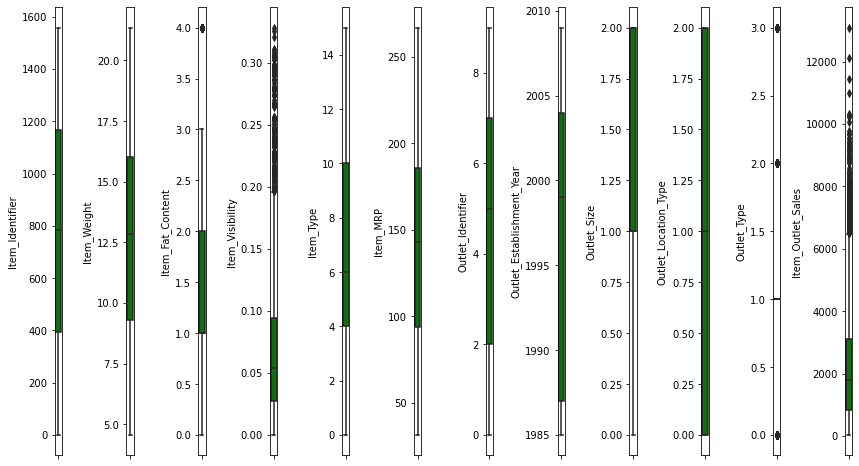

In [166]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="green",orient="v")
    plt.tight_layout()

####  we can see that their is only one column item_visibility  who have outlier so we removed that in further step

In [167]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[1.38851383, 0.84187169, 0.57284357, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.64170589, 0.97809218, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.09855449, 0.57284357, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.53424315, 0.57284357, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.33644372, 0.97809218, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.45963367, 0.57284357, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [168]:
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [169]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)

In [170]:
q1

Item_Identifier               395.500000
Item_Weight                     9.310000
Item_Fat_Content                1.000000
Item_Visibility                 0.026989
Item_Type                       4.000000
Item_MRP                       93.826500
Outlet_Identifier               2.000000
Outlet_Establishment_Year    1987.000000
Outlet_Size                     1.000000
Outlet_Location_Type            0.000000
Outlet_Type                     1.000000
Item_Outlet_Sales             834.247400
Name: 0.25, dtype: float64

In [171]:
q3

Item_Identifier              1167.000000
Item_Weight                    16.000000
Item_Fat_Content                2.000000
Item_Visibility                 0.094585
Item_Type                      10.000000
Item_MRP                      185.643700
Outlet_Identifier               7.000000
Outlet_Establishment_Year    2004.000000
Outlet_Size                     2.000000
Outlet_Location_Type            2.000000
Outlet_Type                     1.000000
Item_Outlet_Sales            3101.296400
Name: 0.75, dtype: float64

In [172]:
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [173]:
df.shape

(8523, 12)

In [174]:
df_new.shape

(8222, 12)

In [175]:
((8523-8222)/8523)*100

3.5316203214830457

In [176]:
features=df.drop("Item_Outlet_Sales",axis=1)
target=df["Item_Outlet_Sales"]

### scalling the data using min max scaler:-


In [177]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [178]:
for i in range(0,1000):
    feature_train,feature_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(feature_train,target_train)
    pred_train=lr.predict(feature_train)
    pred_test=lr.predict(feature_test)
    print(f"at Random State{i},the training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"at Random State{i},the training accuracy is:-{r2_score(target_test,pred_test)}")
    print("\n")

at Random State0,the training accuracy is:-0.5095637584210899
at Random State0,the training accuracy is:-0.5127044026662453


at Random State1,the training accuracy is:-0.5102315378105476
at Random State1,the training accuracy is:-0.5093274544624926


at Random State2,the training accuracy is:-0.5140207882509149
at Random State2,the training accuracy is:-0.49469407947463173


at Random State3,the training accuracy is:-0.5014271456689643
at Random State3,the training accuracy is:-0.5440519386858895


at Random State4,the training accuracy is:-0.5126567470805996
at Random State4,the training accuracy is:-0.49819408358524986


at Random State5,the training accuracy is:-0.5121406622636986
at Random State5,the training accuracy is:-0.5021400687818707


at Random State6,the training accuracy is:-0.5103657349919776
at Random State6,the training accuracy is:-0.5085999530194932


at Random State7,the training accuracy is:-0.5140939682558932
at Random State7,the training accuracy is:-0.495566275

at Random State66,the training accuracy is:-0.5112741838240988
at Random State66,the training accuracy is:-0.5059797628246435


at Random State67,the training accuracy is:-0.5095052575635131
at Random State67,the training accuracy is:-0.5125746266255038


at Random State68,the training accuracy is:-0.5092473666512838
at Random State68,the training accuracy is:-0.5130484894035054


at Random State69,the training accuracy is:-0.5111230767457018
at Random State69,the training accuracy is:-0.5056274003686316


at Random State70,the training accuracy is:-0.5079742824330875
at Random State70,the training accuracy is:-0.5184380885209097


at Random State71,the training accuracy is:-0.5099369259043507
at Random State71,the training accuracy is:-0.5107777077420328


at Random State72,the training accuracy is:-0.5060345851341853
at Random State72,the training accuracy is:-0.5263521119980733


at Random State73,the training accuracy is:-0.5119011546826504
at Random State73,the training accuracy i

at Random State132,the training accuracy is:-0.5085146170419725
at Random State132,the training accuracy is:-0.5161064027716948


at Random State133,the training accuracy is:-0.5142340926141948
at Random State133,the training accuracy is:-0.4931793735466272


at Random State134,the training accuracy is:-0.5088379738130537
at Random State134,the training accuracy is:-0.5147376728623975


at Random State135,the training accuracy is:-0.5100260701290589
at Random State135,the training accuracy is:-0.5098820691495658


at Random State136,the training accuracy is:-0.503817936717931
at Random State136,the training accuracy is:-0.535142300762051


at Random State137,the training accuracy is:-0.5128967341658688
at Random State137,the training accuracy is:-0.4984836500073646


at Random State138,the training accuracy is:-0.5077607039485578
at Random State138,the training accuracy is:-0.5186900322995096


at Random State139,the training accuracy is:-0.5132554460665386
at Random State139,the train

at Random State202,the training accuracy is:-0.5132878581551682
at Random State202,the training accuracy is:-0.4974578440527291


at Random State203,the training accuracy is:-0.5099478456849675
at Random State203,the training accuracy is:-0.5086063679030295


at Random State204,the training accuracy is:-0.5122979715427447
at Random State204,the training accuracy is:-0.5018151735373965


at Random State205,the training accuracy is:-0.5148041749271701
at Random State205,the training accuracy is:-0.48744355500224346


at Random State206,the training accuracy is:-0.514752045134153
at Random State206,the training accuracy is:-0.48986016018724277


at Random State207,the training accuracy is:-0.5159652931728724
at Random State207,the training accuracy is:-0.4856944171583054


at Random State208,the training accuracy is:-0.5112904168836762
at Random State208,the training accuracy is:-0.50601136970665


at Random State209,the training accuracy is:-0.5081944773611466
at Random State209,the trai

at Random State274,the training accuracy is:-0.5122213661413124
at Random State274,the training accuracy is:-0.5019365462248797


at Random State275,the training accuracy is:-0.5087627590794574
at Random State275,the training accuracy is:-0.5153983150372163


at Random State276,the training accuracy is:-0.5095545876168581
at Random State276,the training accuracy is:-0.5114967588730386


at Random State277,the training accuracy is:-0.5091899817806251
at Random State277,the training accuracy is:-0.5136540018915841


at Random State278,the training accuracy is:-0.5150048119673287
at Random State278,the training accuracy is:-0.48581211780825606


at Random State279,the training accuracy is:-0.5095199881697032
at Random State279,the training accuracy is:-0.512660066543547


at Random State280,the training accuracy is:-0.5084725646353512
at Random State280,the training accuracy is:-0.5166133220136427


at Random State281,the training accuracy is:-0.514117783647803
at Random State281,the trai

at Random State346,the training accuracy is:-0.5048217606031085
at Random State346,the training accuracy is:-0.5302844939416989


at Random State347,the training accuracy is:-0.5148086189758196
at Random State347,the training accuracy is:-0.4908373913634031


at Random State348,the training accuracy is:-0.512077454331171
at Random State348,the training accuracy is:-0.5023698285798608


at Random State349,the training accuracy is:-0.5070196229446721
at Random State349,the training accuracy is:-0.5230994606139648


at Random State350,the training accuracy is:-0.5122920311533858
at Random State350,the training accuracy is:-0.5021597702318437


at Random State351,the training accuracy is:-0.5075652256977412
at Random State351,the training accuracy is:-0.5194248505470878


at Random State352,the training accuracy is:-0.5076424517216627
at Random State352,the training accuracy is:-0.5195605259146896


at Random State353,the training accuracy is:-0.5091975256780075
at Random State353,the trai

at Random State412,the training accuracy is:-0.5084434612493697
at Random State412,the training accuracy is:-0.5167136837377324


at Random State413,the training accuracy is:-0.5102183388260737
at Random State413,the training accuracy is:-0.5094083257824029


at Random State414,the training accuracy is:-0.5100225276857583
at Random State414,the training accuracy is:-0.5104305223530382


at Random State415,the training accuracy is:-0.5045032361206785
at Random State415,the training accuracy is:-0.5315939485957195


at Random State416,the training accuracy is:-0.5071758339205905
at Random State416,the training accuracy is:-0.5213423617485742


at Random State417,the training accuracy is:-0.5089423285995252
at Random State417,the training accuracy is:-0.5151330465883216


at Random State418,the training accuracy is:-0.5111547642280612
at Random State418,the training accuracy is:-0.5057274617637881


at Random State419,the training accuracy is:-0.5169598103176375
at Random State419,the tra

at Random State477,the training accuracy is:-0.5109817258158016
at Random State477,the training accuracy is:-0.5070596335577933


at Random State478,the training accuracy is:-0.5077800450568077
at Random State478,the training accuracy is:-0.5197853095441718


at Random State479,the training accuracy is:-0.5092963643645375
at Random State479,the training accuracy is:-0.5128050539663764


at Random State480,the training accuracy is:-0.5131664467000032
at Random State480,the training accuracy is:-0.49864395205752887


at Random State481,the training accuracy is:-0.5139872327397377
at Random State481,the training accuracy is:-0.49166036707670935


at Random State482,the training accuracy is:-0.5122460635999417
at Random State482,the training accuracy is:-0.501266418546906


at Random State483,the training accuracy is:-0.51129441344907
at Random State483,the training accuracy is:-0.5052595794177802


at Random State484,the training accuracy is:-0.5080712403423265
at Random State484,the trai

at Random State543,the training accuracy is:-0.5099534483387012
at Random State543,the training accuracy is:-0.5108665161740951


at Random State544,the training accuracy is:-0.513633251319062
at Random State544,the training accuracy is:-0.49613488583930043


at Random State545,the training accuracy is:-0.5103899122426057
at Random State545,the training accuracy is:-0.5092746258347058


at Random State546,the training accuracy is:-0.5110415777120929
at Random State546,the training accuracy is:-0.5063045918456343


at Random State547,the training accuracy is:-0.512992646286022
at Random State547,the training accuracy is:-0.4986605089174271


at Random State548,the training accuracy is:-0.5094458917809566
at Random State548,the training accuracy is:-0.5126644269518541


at Random State549,the training accuracy is:-0.5051922434890171
at Random State549,the training accuracy is:-0.5294589066789502


at Random State550,the training accuracy is:-0.5122524758070113
at Random State550,the trai

at Random State610,the training accuracy is:-0.5109906751089978
at Random State610,the training accuracy is:-0.5065548240917922


at Random State611,the training accuracy is:-0.515035442169183
at Random State611,the training accuracy is:-0.488060019188046


at Random State612,the training accuracy is:-0.5095499953824828
at Random State612,the training accuracy is:-0.5128141272200778


at Random State613,the training accuracy is:-0.5124249036238098
at Random State613,the training accuracy is:-0.49985007179268726


at Random State614,the training accuracy is:-0.5150360174930826
at Random State614,the training accuracy is:-0.48808016505507423


at Random State615,the training accuracy is:-0.5112143031056706
at Random State615,the training accuracy is:-0.5048063332885936


at Random State616,the training accuracy is:-0.5099943375295187
at Random State616,the training accuracy is:-0.5109929063313211


at Random State617,the training accuracy is:-0.5123487494854928
at Random State617,the tra

at Random State677,the training accuracy is:-0.5072986958257408
at Random State677,the training accuracy is:-0.5203331267579963


at Random State678,the training accuracy is:-0.508931932535178
at Random State678,the training accuracy is:-0.5146779580521392


at Random State679,the training accuracy is:-0.5032396555161517
at Random State679,the training accuracy is:-0.5362182096876049


at Random State680,the training accuracy is:-0.5133746756618349
at Random State680,the training accuracy is:-0.49547617350785556


at Random State681,the training accuracy is:-0.5094610500295629
at Random State681,the training accuracy is:-0.5125731370273541


at Random State682,the training accuracy is:-0.504095987399215
at Random State682,the training accuracy is:-0.5333492535791986


at Random State683,the training accuracy is:-0.5119597181710172
at Random State683,the training accuracy is:-0.50239317226881


at Random State684,the training accuracy is:-0.5129041018823991
at Random State684,the traini

at Random State742,the training accuracy is:-0.5078179469524647
at Random State742,the training accuracy is:-0.5168996076648283


at Random State743,the training accuracy is:-0.5075224894200496
at Random State743,the training accuracy is:-0.5200186224064361


at Random State744,the training accuracy is:-0.5104041224873119
at Random State744,the training accuracy is:-0.5076319158636611


at Random State745,the training accuracy is:-0.5133322432530806
at Random State745,the training accuracy is:-0.49583297016499994


at Random State746,the training accuracy is:-0.5090339289967845
at Random State746,the training accuracy is:-0.5148652099578199


at Random State747,the training accuracy is:-0.5129746237923907
at Random State747,the training accuracy is:-0.49831895029771966


at Random State748,the training accuracy is:-0.5076002512351713
at Random State748,the training accuracy is:-0.5191505509560272


at Random State749,the training accuracy is:-0.5133308252450585
at Random State749,the t

at Random State808,the training accuracy is:-0.5066230968624124
at Random State808,the training accuracy is:-0.52452981774966


at Random State809,the training accuracy is:-0.5074077904382742
at Random State809,the training accuracy is:-0.5191585450076162


at Random State810,the training accuracy is:-0.5122684096484287
at Random State810,the training accuracy is:-0.5020731900046913


at Random State811,the training accuracy is:-0.5161166375396666
at Random State811,the training accuracy is:-0.4853971060391171


at Random State812,the training accuracy is:-0.5115220184886002
at Random State812,the training accuracy is:-0.5039183829121099


at Random State813,the training accuracy is:-0.5155572406654534
at Random State813,the training accuracy is:-0.4863107471173398


at Random State814,the training accuracy is:-0.5100028340714351
at Random State814,the training accuracy is:-0.509178100389263


at Random State815,the training accuracy is:-0.5158651734312394
at Random State815,the traini

at Random State873,the training accuracy is:-0.5020619809920988


at Random State874,the training accuracy is:-0.510244436880795
at Random State874,the training accuracy is:-0.5097187211455827


at Random State875,the training accuracy is:-0.5148707351394476
at Random State875,the training accuracy is:-0.48988778875998984


at Random State876,the training accuracy is:-0.5097542613391044
at Random State876,the training accuracy is:-0.5114179767618655


at Random State877,the training accuracy is:-0.5110442983469015
at Random State877,the training accuracy is:-0.5063755755420948


at Random State878,the training accuracy is:-0.5049877807227845
at Random State878,the training accuracy is:-0.5308035240377718


at Random State879,the training accuracy is:-0.5068953175564782
at Random State879,the training accuracy is:-0.5225787254252945


at Random State880,the training accuracy is:-0.5180482402962084
at Random State880,the training accuracy is:-0.47774364491174925


at Random State881,the 

at Random State940,the training accuracy is:-0.5096138929241323
at Random State940,the training accuracy is:-0.512493659443417


at Random State941,the training accuracy is:-0.5064270897976164
at Random State941,the training accuracy is:-0.5233187433794644


at Random State942,the training accuracy is:-0.5095741161900993
at Random State942,the training accuracy is:-0.5121408683171498


at Random State943,the training accuracy is:-0.5094856955854761
at Random State943,the training accuracy is:-0.5131320045308182


at Random State944,the training accuracy is:-0.5054937011381078
at Random State944,the training accuracy is:-0.5282016152817346


at Random State945,the training accuracy is:-0.5144882947491027
at Random State945,the training accuracy is:-0.48960956716367776


at Random State946,the training accuracy is:-0.5060319611071668
at Random State946,the training accuracy is:-0.5258582827908933


at Random State947,the training accuracy is:-0.5089305438887379
at Random State947,the tra

In [191]:
features_train,features_test,target_train,target_test,=train_test_split(features,target,test_size=.33,random_state=42)

In [192]:
lr.fit(features_train,target_train)

LinearRegression()

In [193]:
lr.score(features_train,target_train)

0.5089235627988349

In [195]:
predict_test=lr.predict(features_test)

###  Cross Validation the Model

In [199]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold{j} the cv score is{cv_mean} and accuracy score for training{Train_accuracy}and accuracy for the testing is{Test_accuracy}")
    print("\n")     



ValueError: Found input variables with inconsistent numbers of samples: [5710, 6818]